# Spline Interpolations of a given analytic function

## 0. Definitions of Plotting parameters

In [34]:
import numpy as np

a, b, n_plot = -10, 20, 1000
x_plot = np.linspace(a, b, n_plot)
# print("x_plot =", x_plot)

## 1. Definition of f

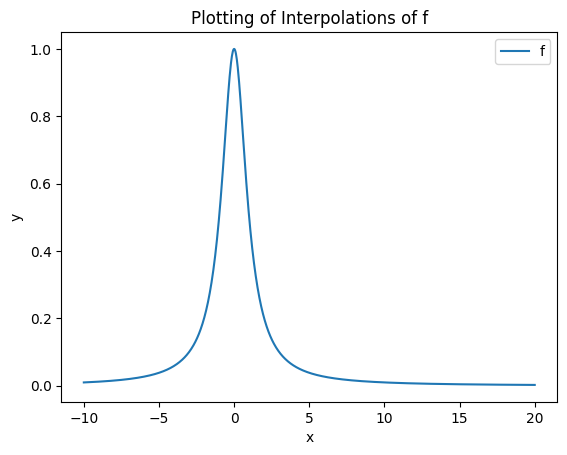

In [35]:
from utils import *

# f_exp = "cos(x)" # "1/(1+x**2)"
# def f(x):
    # return eval(f_exp, {"x": x})

f = lambda x: 1/(1+x**2)

fig, ax = set_fig()
plot_f(ax, f, x_plot)

## 2. Definition of Interpolation parameters

In [36]:
n = 40

# Defintion of Uniforms points
x_uniform = np.linspace(a, b, n)
y_uniform = [f(x) for x in x_uniform]
print("Uniforms points")
print("x_uniform =", x_uniform)
print("\ny_uniform =", y_uniform)

Uniforms points
x_uniform = [-10.          -9.23076923  -8.46153846  -7.69230769  -6.92307692
  -6.15384615  -5.38461538  -4.61538462  -3.84615385  -3.07692308
  -2.30769231  -1.53846154  -0.76923077   0.           0.76923077
   1.53846154   2.30769231   3.07692308   3.84615385   4.61538462
   5.38461538   6.15384615   6.92307692   7.69230769   8.46153846
   9.23076923  10.          10.76923077  11.53846154  12.30769231
  13.07692308  13.84615385  14.61538462  15.38461538  16.15384615
  16.92307692  17.69230769  18.46153846  19.23076923  20.        ]

y_uniform = [0.009900990099009901, 0.011599972544443685, 0.013774553753362133, 0.01661913659160193, 0.020437779658967224, 0.025726899071395953, 0.033339909252318015, 0.044839479968161323, 0.0633195953540652, 0.09553420011305824, 0.15809167446211417, 0.29701230228471004, 0.6282527881040898, 1.0, 0.6282527881040887, 0.29701230228471004, 0.15809167446211406, 0.09553420011305815, 0.06331959535406517, 0.04483947996816129, 0.03333990925231801, 

## 3. Test of Linear Spline Interpolation

In [37]:
from polynomial.newton_poly import  Spline1Poly

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
print("x =", x)
print("y =", y)
polynomial = Spline1Poly(x, y)
print(polynomial)

x = 1.5
value = polynomial.horner_eval(x)
print(f"P({x}) = {value}")

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
P(x) =	 1.0 + 3.0 * (x - 1.0)   if x in [1.0, 2.0]
	 4.0 + 5.0 * (x - 2.0)   if x in [2.0, 3.0]
	 9.0 + 7.0 * (x - 3.0)   if x in [3.0, 4.0]
	 16.0 + 9.0 * (x - 4.0)   if x in [4.0, 5.0]
	 25.0 + 11.0 * (x - 5.0)   if x in [5.0, 6.0]
	 36.0 + 13.0 * (x - 6.0)   if x in [6.0, 7.0]
	 49.0 + 15.0 * (x - 7.0)   if x in [7.0, 8.0]
	 64.0 + 17.0 * (x - 8.0)   if x in [8.0, 9.0]
	 81.0 + 19.0 * (x - 9.0)   if x in [9.0, 10.0]

P(1.5) = 2.5


## 4. Uniform Linear Spline Interpolation of f

Uni_linear_spline_poly(x) =	 0.009901 + 0.002209 * (x + 10.0)   if x in [-10.0, -9.23076923076923]
	 0.0116 + 0.002827 * (x + 9.230769)   if x in [-9.23076923076923, -8.461538461538462]
	 0.013775 + 0.003698 * (x + 8.461538)   if x in [-8.461538461538462, -7.692307692307692]
	 0.016619 + 0.004964 * (x + 7.692308)   if x in [-7.692307692307692, -6.923076923076923]
	 0.020438 + 0.006876 * (x + 6.923077)   if x in [-6.923076923076923, -6.153846153846153]
	 0.025727 + 0.009897 * (x + 6.153846)   if x in [-6.153846153846153, -5.384615384615384]
	 0.03334 + 0.014949 * (x + 5.384615)   if x in [-5.384615384615384, -4.615384615384615]
	 0.044839 + 0.024024 * (x + 4.615385)   if x in [-4.615384615384615, -3.846153846153846]
	 0.06332 + 0.041879 * (x + 3.846154)   if x in [-3.846153846153846, -3.0769230769230766]
	 0.095534 + 0.081325 * (x + 3.076923)   if x in [-3.0769230769230766, -2.3076923076923075]
	 0.158092 + 0.180597 * (x + 2.307692)   if x in [-2.3076923076923075, -1.5384615384615383]
	

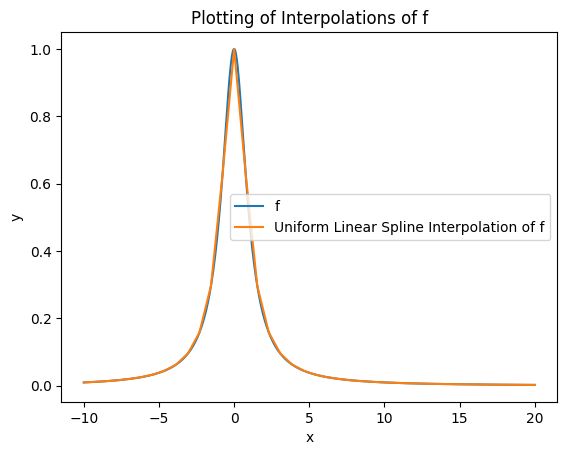

In [38]:
uni_linear_spline_poly = Spline1Poly(x_uniform, y_uniform, "Uni_linear_spline_poly")

print(uni_linear_spline_poly)

x0 = 1
print(f"\nUni_linear_spline_poly({x0}) =", uni_linear_spline_poly.horner_eval(x0))

# print("\nx_uniform =", x_uniform)
# print("\ny_uniform =", y_uniform)

fig, ax = set_fig()
plot_f(ax, f, x_plot)

uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")

## 5. Uniform Cubic Spline Interpolation of f

Uni_spline3_poly(x) =	 0.009901 + 0.002088 * (x + 10.0) + 0.000204 * (x + 10.0)^3   if x in [-10.0, -9.23076923076923]
	 0.0116 + 0.00245 * (x + 9.230769) + 0.00047 * (x + 9.230769)^2 + 2.6e-05 * (x + 9.230769)^3   if x in [-9.23076923076923, -8.461538461538462]
	 0.013775 + 0.00322 * (x + 8.461538) + 0.000531 * (x + 8.461538)^2 + 0.000118 * (x + 8.461538)^3   if x in [-8.461538461538462, -7.692307692307692]
	 0.016619 + 0.004246 * (x + 7.692308) + 0.000804 * (x + 7.692308)^2 + 0.000169 * (x + 7.692308)^3   if x in [-7.692307692307692, -6.923076923076923]
	 0.020438 + 0.005782 * (x + 6.923077) + 0.001193 * (x + 6.923077)^2 + 0.000297 * (x + 6.923077)^3   if x in [-6.923076923076923, -6.153846153846153]
	 0.025727 + 0.008145 * (x + 6.153846) + 0.001878 * (x + 6.153846)^2 + 0.000519 * (x + 6.153846)^3   if x in [-6.153846153846153, -5.384615384615384]
	 0.03334 + 0.011956 * (x + 5.384615) + 0.003076 * (x + 5.384615)^2 + 0.001059 * (x + 5.384615)^3   if x in [-5.384615384615384, -4.615384

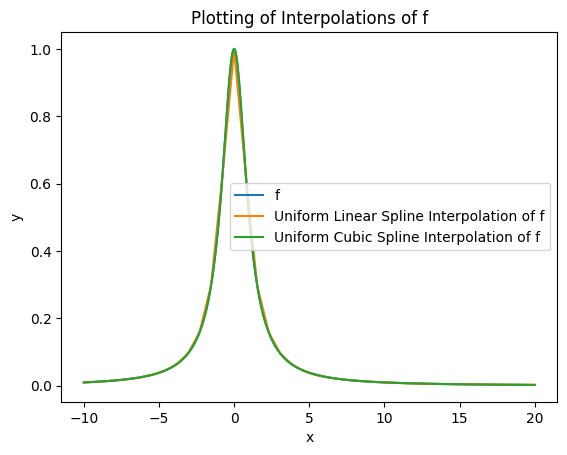

In [39]:
from polynomial.taylor_poly import Spline3Polys
      
uni_spline3_poly = Spline3Polys(x_uniform, y_uniform, "Uni_spline3_poly")

print(uni_spline3_poly)

x0 = 1
print(f"\nUni_spline3_poly({x0}) =", uni_spline3_poly.horner_eval(x0))

fig, ax = set_fig()
plot_f(ax, f, x_plot)

# print("\nx_uniform =", x_uniform)
# print("\ny_uniform =", y_uniform)

uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")
uni_spline3_poly.plot(ax, n_plot, "Uniform Cubic Spline Interpolation of f")

## 6. Errors of SPline Interpolations of f

err_spline1 = 0.07612371912240237
err_spline3 = 0.0010423319658657137


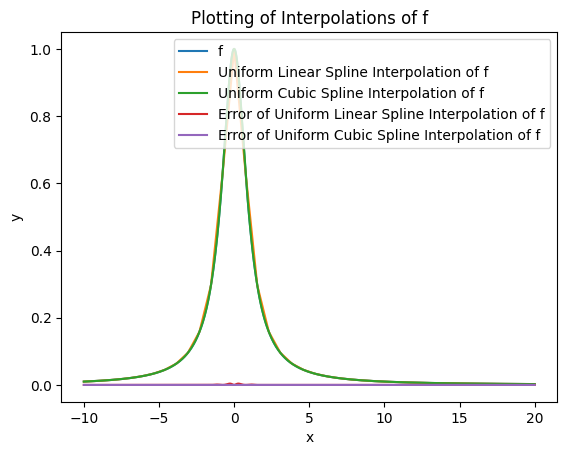

In [40]:
from integration import gauss_integration

func_err_spline1 = lambda x: (f(x) - uni_linear_spline_poly.horner_eval(x))**2
func_err_spline3 = lambda x: (f(x) - uni_spline3_poly.horner_eval(x))**2
err_spline1 = sqrt(gauss_integration(func_err_spline1, a, b))
err_spline3 = sqrt(gauss_integration(func_err_spline3, a, b))
print("err_spline1 =", err_spline1)
print("err_spline3 =", err_spline3)

fig, ax = set_fig()

plot_f(ax, f, x_plot)
uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")
uni_spline3_poly.plot(ax, n_plot, "Uniform Cubic Spline Interpolation of f")

y_uni_plot = [func_err_spline1(x) for x  in x_plot]
ax.plot(x_plot, y_uni_plot, label="Error of Uniform Linear Spline Interpolation of f")

y_tche_plot = [func_err_spline3(x) for x  in x_plot]
ax.plot(x_plot, y_tche_plot, label="Error of Uniform Cubic Spline Interpolation of f")

ax.legend()
